In [10]:
#Import dependencies and setup data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import matplotlib.pyplot as plt
from pylab import rcParams
#for better graph 
import seaborn as sb 

import scipy 
from scipy.stats.stats import pearsonr 

In [11]:
#Visualization setting 
%matplotlib inline
rcParams["figure.figsize"] = 5,4
sb.set_style("whitegrid")

In [12]:
#Import data from data source 
game_fitbit ="dailyActivity_merged_final.csv"
data_cause = "dailyActivity_merged_final.csv"

fitbit = pd.read_csv(game_fitbit)
fitbit_game =pd.read_csv(data_cause)
fitbit_game.head()
# Combine the data into a single dataset

#to_model_data.to_csv("Heart_Mod.csv")
#diabetic_cause.head()
#diabteitc_mortality.head(20)


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,11935.780000,7.732800,7.732800,0.0,2.830000,0.733800,4.162600,0.0000,37.620000,17.900000,223.080000,833.600000,1808.740000
1,1624580081,5167.200000,3.471000,3.471000,0.0,0.602000,0.234000,2.626800,0.0058,5.660000,3.820000,141.160000,1265.560000,1433.780000
2,1644430081,7780.925000,5.658750,5.658750,0.0,0.831000,1.220750,3.601750,0.0050,10.875000,26.900000,190.775000,1129.950000,2837.575000
3,1844505072,2876.023256,1.901628,1.901628,0.0,0.020233,0.043953,1.836279,0.0000,0.302326,1.139535,127.465116,1158.813953,1585.325581
4,1927972279,1269.069767,0.879070,0.879070,0.0,0.069070,0.039767,0.770000,0.0000,0.953488,1.023256,58.976744,1215.697674,2195.465116


In [13]:
# Pearson corelation 
fitbit_game.columns=['Id','TotalSteps','TotalDistance','TrackerDistance',"LoggedActivitiesDistance",'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance',
                       'VeryActiveMinutes',"FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes","Calories"]

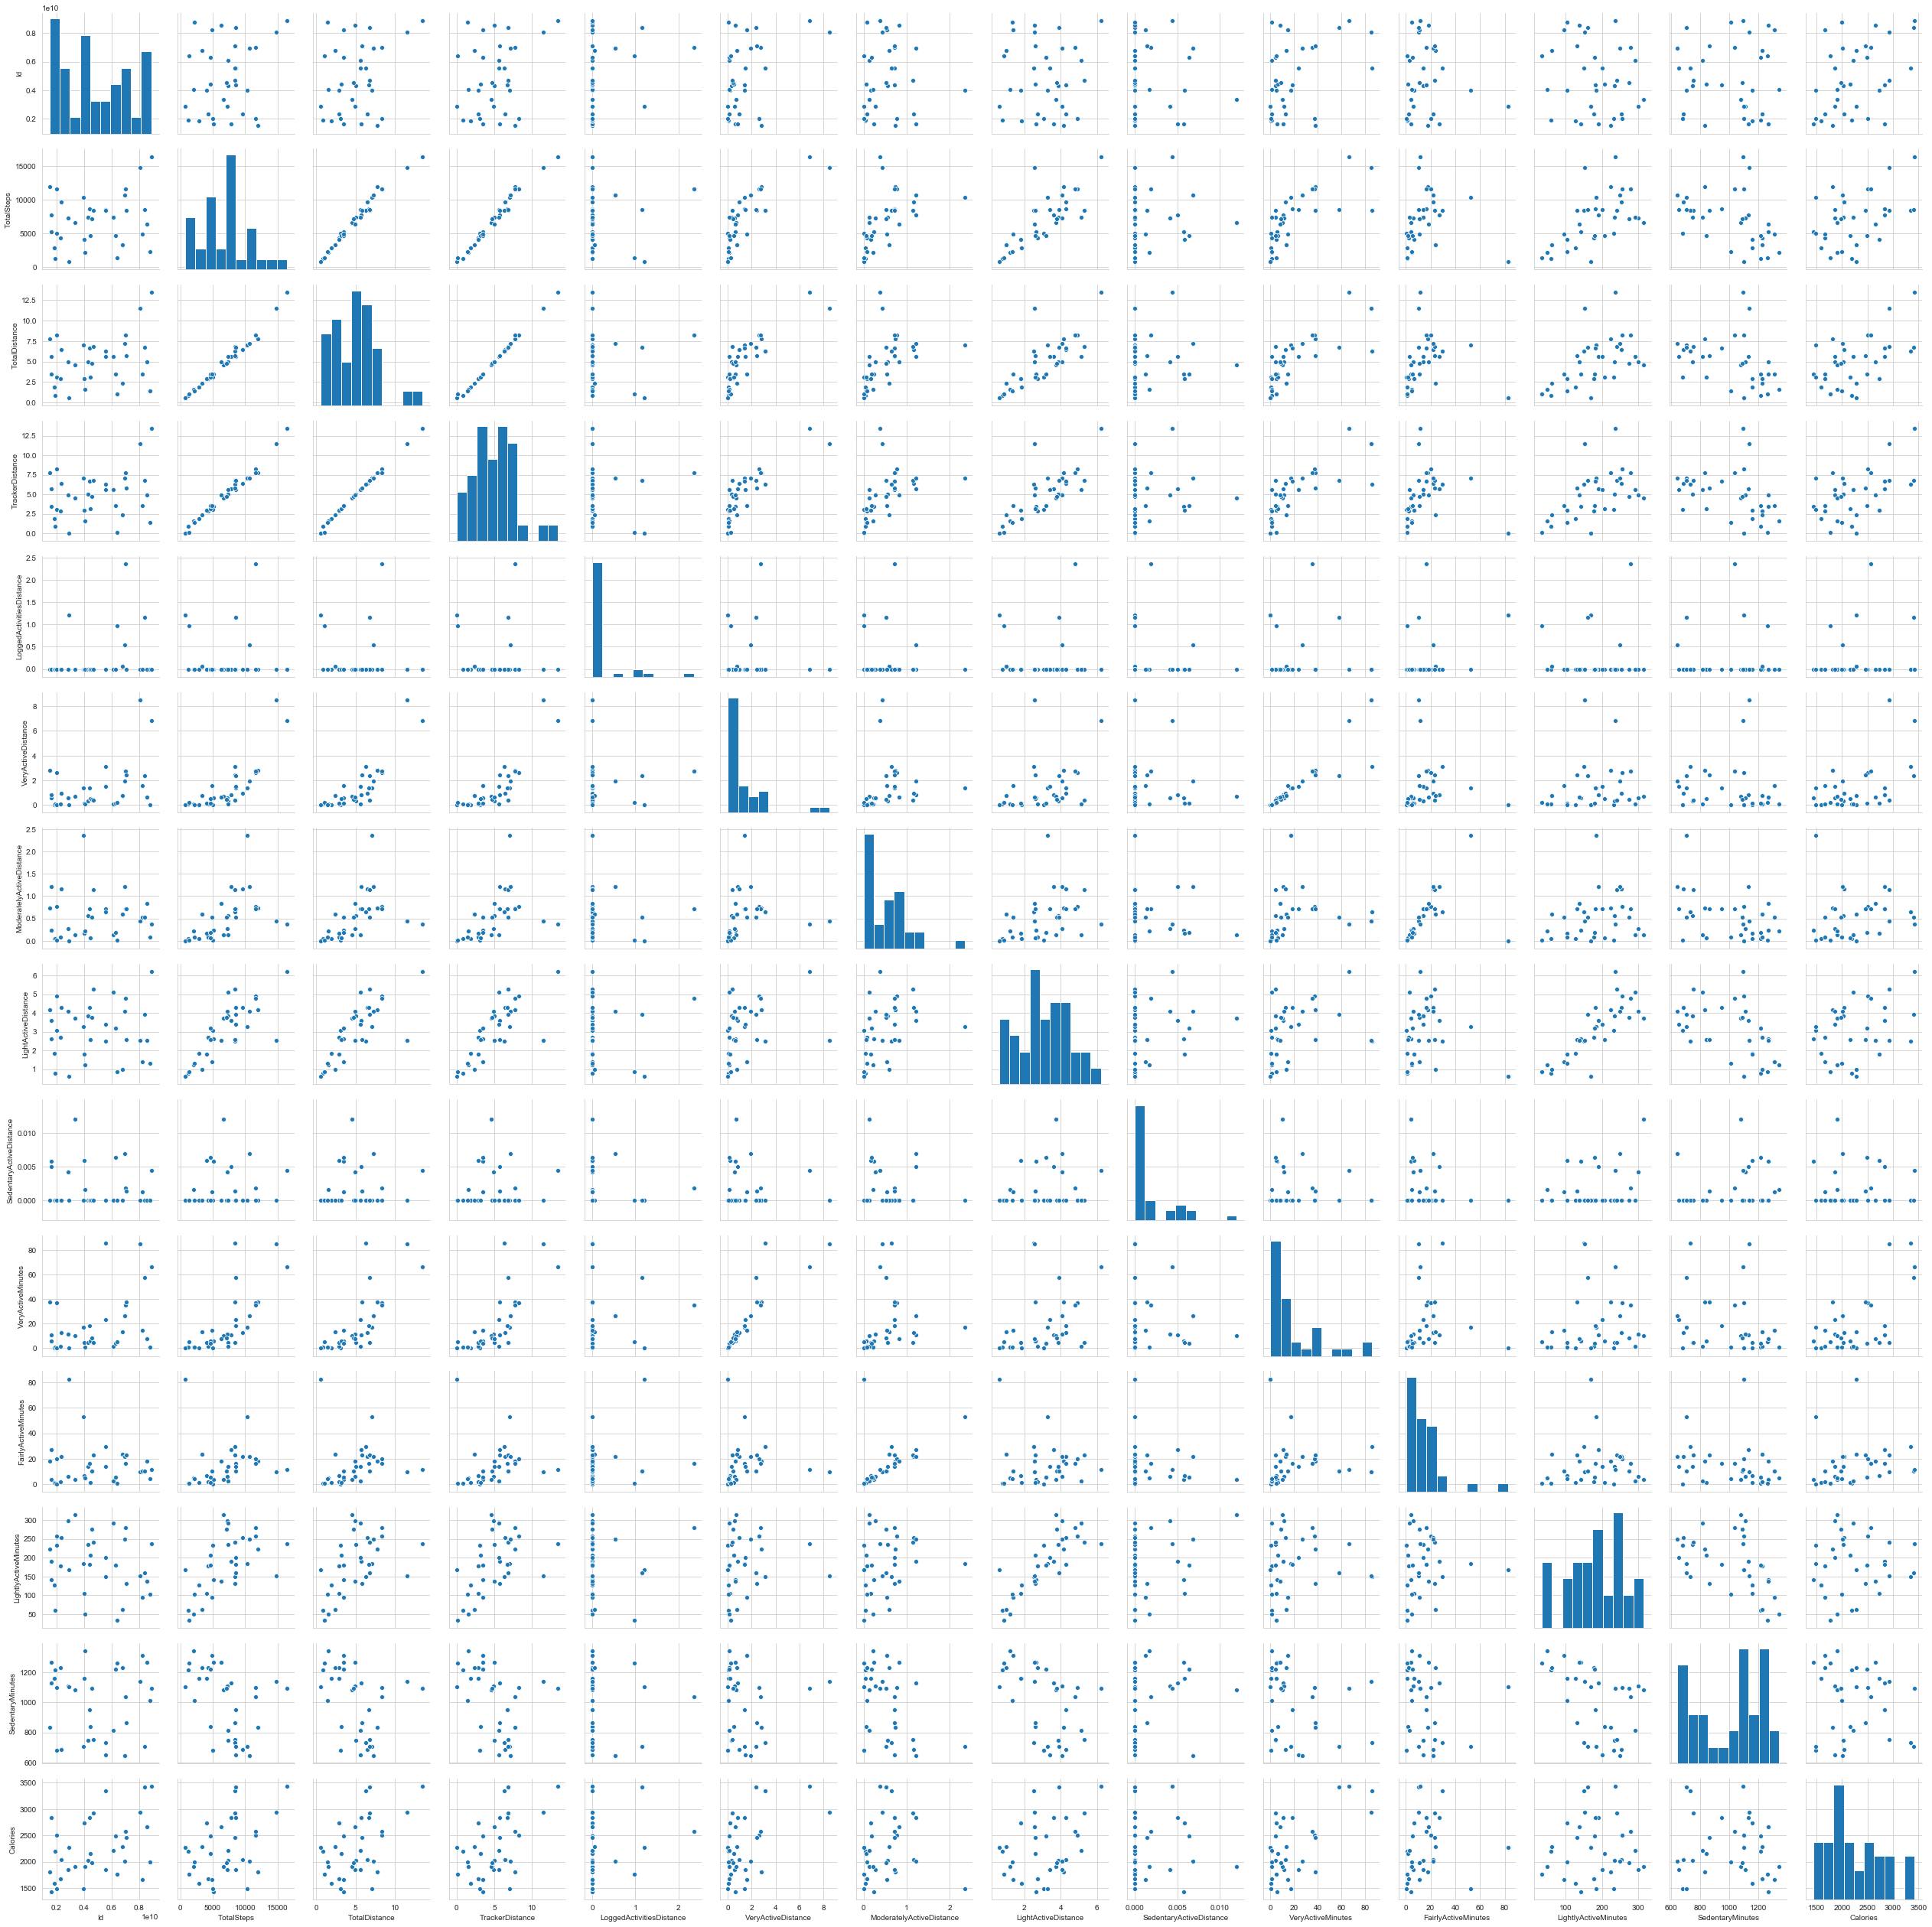

In [14]:
#scatter plot matrix to check for linearity and normalization 
sb.pairplot(fitbit_game)
plt.savefig("Scatter Plot showing linear relationship")

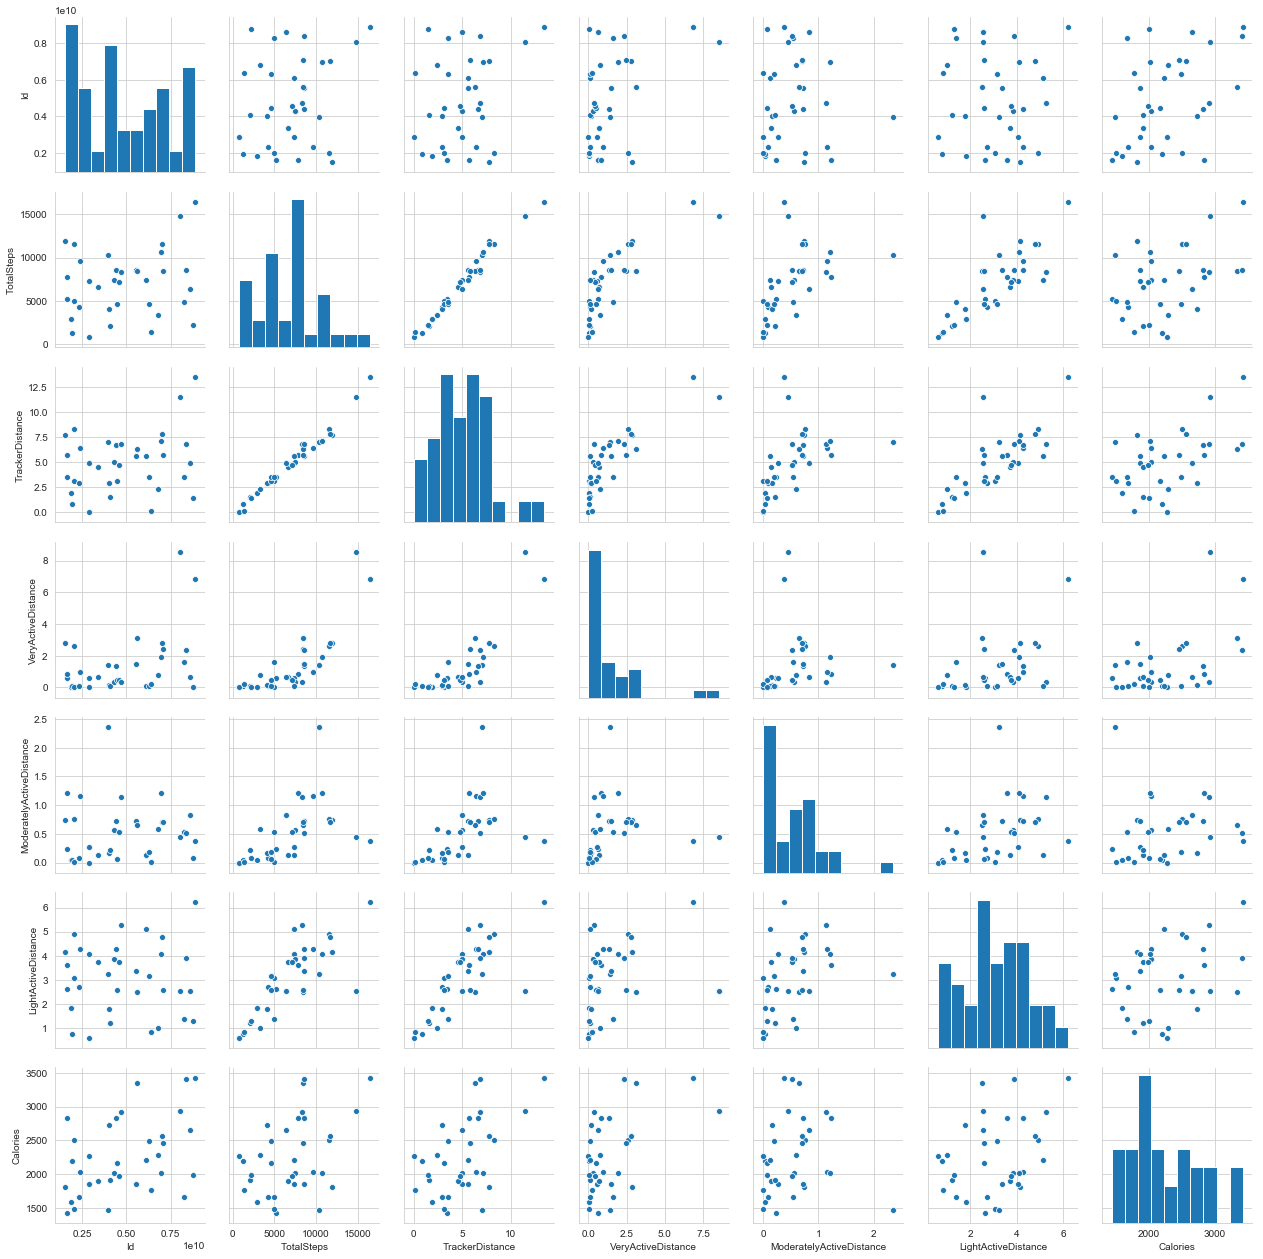

In [19]:
analysis_fitbit = fitbit_game
fitbit_Analysis = analysis_fitbit.drop(['TotalDistance', "LoggedActivitiesDistance","SedentaryActiveDistance",'VeryActiveMinutes',"FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes"], axis=1)
sb.pairplot(fitbit_Analysis)
plt.savefig(" Scatter Plot checking for Normlaity")

In [20]:
#Calculate Pearson correlation Coefficent 
corr = fitbit_Analysis.corr()
corr.to_csv('Correlation Values.csv')
corr

,Id,TotalSteps,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,Calories
Id,1.000000,0.223103,0.280896,0.416449,0.039973,0.011355,0.438851
TotalSteps,0.223103,1.000000,0.986489,0.796968,0.534443,0.786031,0.426180
TrackerDistance,0.280896,0.986489,1.000000,0.824915,0.491541,0.779223,0.521581
VeryActiveDistance,0.416449,0.796968,0.824915,1.000000,0.196829,0.338479,0.517179
ModeratelyActiveDistance,0.039973,0.534443,0.491541,0.196829,1.000000,0.385357,0.103425
LightActiveDistance,0.011355,0.786031,0.779223,0.338479,0.385357,1.000000,0.318802
Calories,0.438851,0.426180,0.521581,0.517179,0.103425,0.318802,1.000000
